c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 113ms/step - accuracy: 0.2981 - loss: 4.2804 - val_accuracy: 0.4375 - val_loss: 2.0483
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.4526 - loss: 1.9834 - val_accuracy: 0.4049 - val_loss: 2.0820
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 104s 111ms/step - accuracy: 0.5291 - loss: 1.7459 - val_accuracy: 0.4862 - val_loss: 1.8557
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 96ms/step - accuracy: 0.5735 - loss: 1.6351 - val_accuracy: 0.3624 - val_loss: 2.3720
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.5941 - loss: 1.5991 - val_accuracy: 0.4515 - val_loss: 2.3243
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.6098 - loss: 1.5700 - val_accuracy: 0.5685 - val_loss: 1.6519
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 96ms/step - accuracy: 0.6174 - loss: 1.5324 - val_accuracy: 0.5636 - val_loss: 1.7057
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.6324 - loss: 1.495

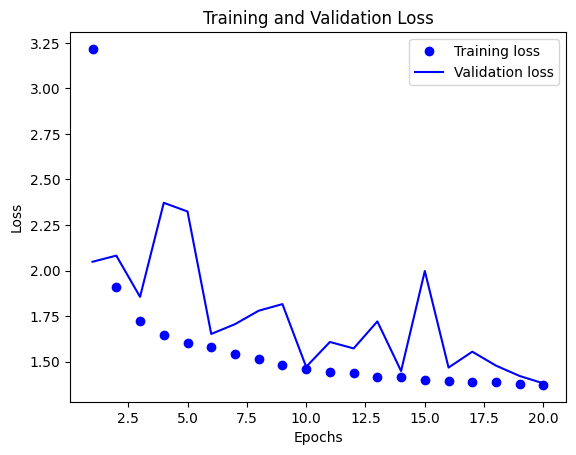

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6684 - loss: 1.3512
Test accuracy: 0.6686999797821045
Test loss: 1.3521751165390015
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
Confusion Matrix:
 [[740  18  87   8  43   3  12  42  36  25]
 [ 18 823   3   4   9   0  22  19  29  87]
 [ 58   8 499  30 126  26 117  74  12   2]
 [ 16   6  94 377 104 124 179  95  12   9]
 [ 25   1  54  36 687   8  81 101   2   2]
 [ 11   2  58 150  84 482  57 178   1   2]
 [  1   3  48  36  30   7 829  14   4   8]
 [  7   3  25  11  83  26  16 794   2  10]
 [132  29  36  22  33   1  22  10 700  18]
 [ 49  75  15   9  20   1  27  55  15 756]]


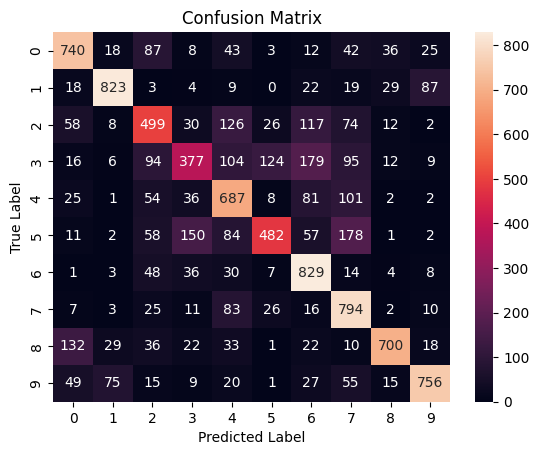

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      1014
           1       0.85      0.81      0.83      1014
           2       0.54      0.52      0.53       952
           3       0.55      0.37      0.44      1016
           4       0.56      0.69      0.62       997
           5       0.71      0.47      0.57      1025
           6       0.61      0.85      0.71       980
           7       0.57      0.81      0.67       977
           8       0.86      0.70      0.77      1003
           9       0.82      0.74      0.78      1022

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



In [15]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses, optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_full, y_full), (x_test, y_test) = cifar10.load_data()

x_full = x_full.astype('float32') / 255.0  
x_test = x_test.astype('float32') / 255.0

# Calculate split sizes
num_train = int(0.6 * len(x_full)) 
num_val = int(0.2 * len(x_full)) 

# Split into training and validation sets
training_x = x_full[:num_train]
training_y = y_full[:num_train]
val_x = x_full[num_train: (num_train + num_val)]
val_y = y_full[num_train: (num_train + num_val)]
test_x = x_full[(num_train + num_val):]
test_y = y_full[(num_train + num_val):]

#Build the CNN
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer='l2'), 
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer= 'adam', metrics=['accuracy'])

history = model.fit(training_x, training_y, epochs=20, validation_data=(val_x, val_y))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(test_x, test_y)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

y_pred = model.predict(test_x)
y_pred_classes = y_pred.argmax(axis=-1) 

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Using Seaborn to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Printing the classification report with precision and recall values
report = classification_report(test_y, y_pred_classes)
print("Classification Report:\n", report)